In [95]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [96]:
data= pd.read_csv(r"/content/heart_disease_cleaned (1).csv")

In [97]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data = pd.get_dummies(data, columns=categorical_cols)
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numerical_cols + [col for col in data.columns if col.startswith('cp_') or col.startswith('thal_')]])

In [98]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
variance_threshold = 0.95
n_components_95 = np.argmax(cumulative_explained_variance >= variance_threshold) + 1
if n_components_95 == 0:
    n_components_95 = len(cumulative_explained_variance)

In [99]:
pca_optimized = PCA(n_components=n_components_95)
X_pca_optimized = pca_optimized.fit_transform(X_scaled)

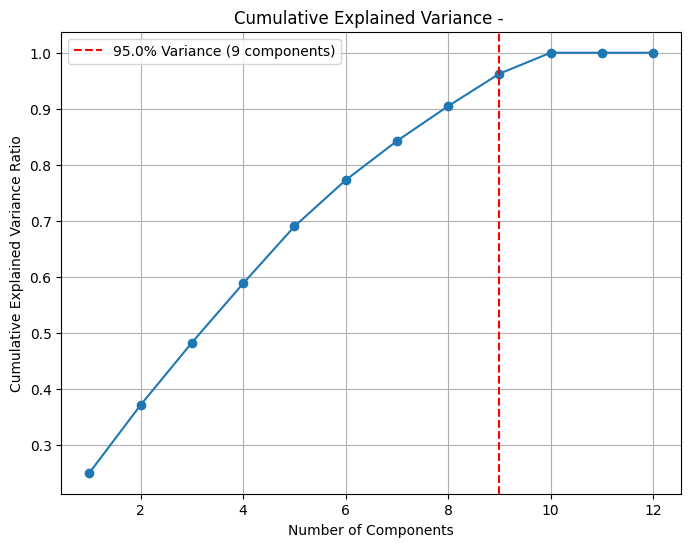

In [100]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.axvline(x=n_components_95, color='r', linestyle='--', label=f'{variance_threshold*100}% Variance ({n_components_95} components)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title(f'Cumulative Explained Variance - ')
plt.legend()
plt.grid(True)
plt.show()


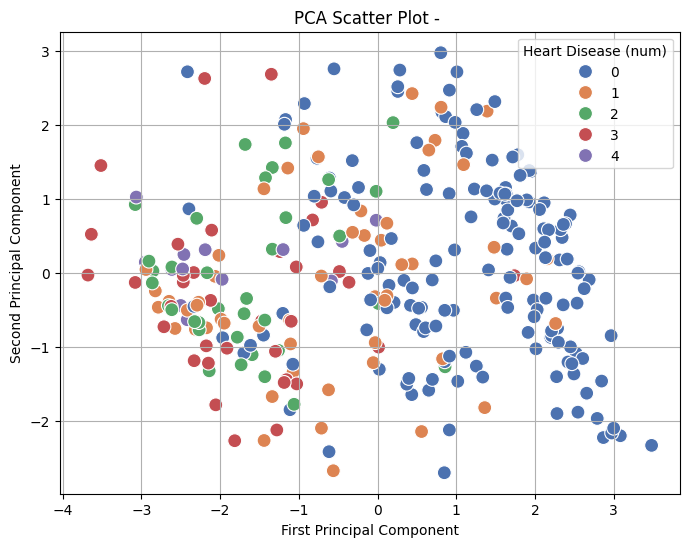

In [101]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_optimized[:, 0], y=X_pca_optimized[:, 1] if X_pca_optimized.shape[1] > 1 else X_pca_optimized[:, 0],
                hue=data['num'], palette='deep', s=100)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component' if X_pca_optimized.shape[1] > 1 else 'First Principal Component')
plt.title(f'PCA Scatter Plot ')
plt.legend(title='Heart Disease (num)')
plt.grid(True)
plt.show()

In [102]:
print(f"Optimal number of components for {variance_threshold*100}% variance: {pca_optimized.n_components_}")
print(f"Cumulative explained variance ratio with {pca_optimized.n_components_} components: {cumulative_explained_variance[pca_optimized.n_components_ - 1]:.4f}")

Optimal number of components for 95.0% variance: 9
Cumulative explained variance ratio with 9 components: 0.9626


In [105]:
pca_columns = [f'PC{i+1}' for i in range(X_pca_optimized.shape[1])]
pca_df = pd.DataFrame(X_pca_optimized, columns=pca_columns, index=data.index)
pca_df['num'] = data['num'].values

In [107]:
pca_df.to_csv(f'results/pca_transformed.csv', index=False)
print(f"PCA-transformed dataset saved as 'results/pca_transformed.csv'")

PCA-transformed dataset saved as 'results/pca_transformed.csv'
